In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
#load data

data=pd.read_csv('waste management.csv')
data.head()



,waste_type,material_composition,recycling_potential,toxicity_level,management_strategy
0,3,0.198716,0.016588,81.011339,0
1,1,0.005522,0.512093,86.707232,0
2,3,0.815461,0.226496,91.324055,0
3,3,0.706857,0.645173,51.134240,0
4,1,0.729007,0.174366,50.151629,0


In [ ]:
data.isnull().sum()

,0
waste_type,0
material_composition,0
recycling_potential,0
toxicity_level,0
management_strategy,0


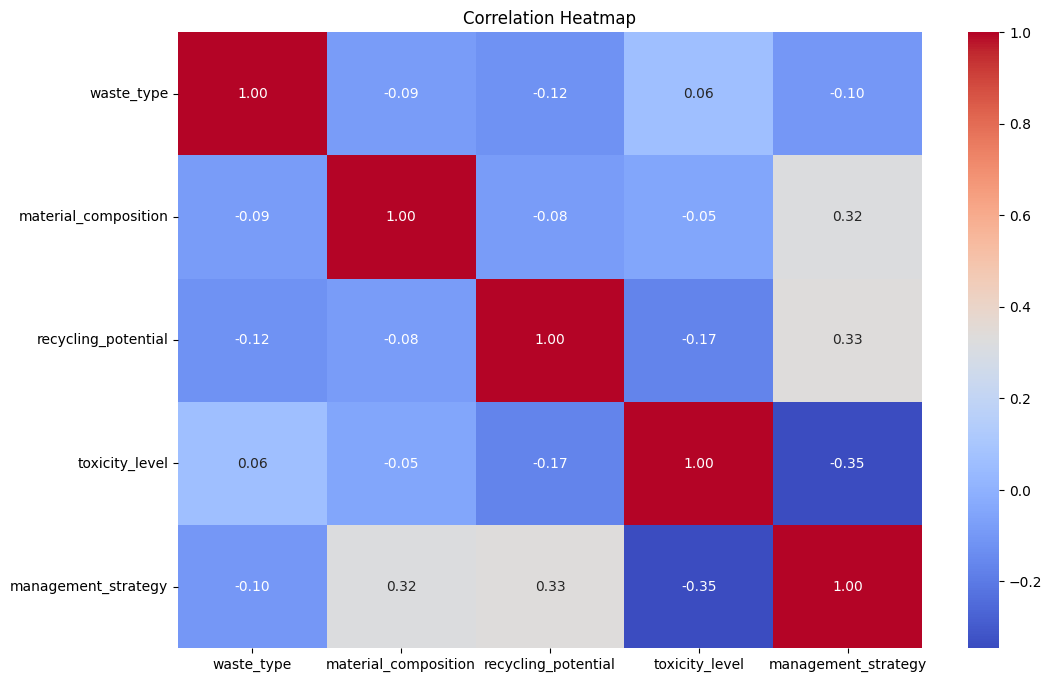

In [ ]:
#correlation heatmap

numeric_df=data.select_dtypes(include=[np.number])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = data[['waste_type','material_composition','recycling_potential','toxicity_level']]
y = data['management_strategy']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling only for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#model Development-decison tree

dt_model= DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt=dt_model.predict(X_test)
y_pred_dt

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#accuracy score for dt

accuracy_score(y_test,y_pred_dt)

0.95

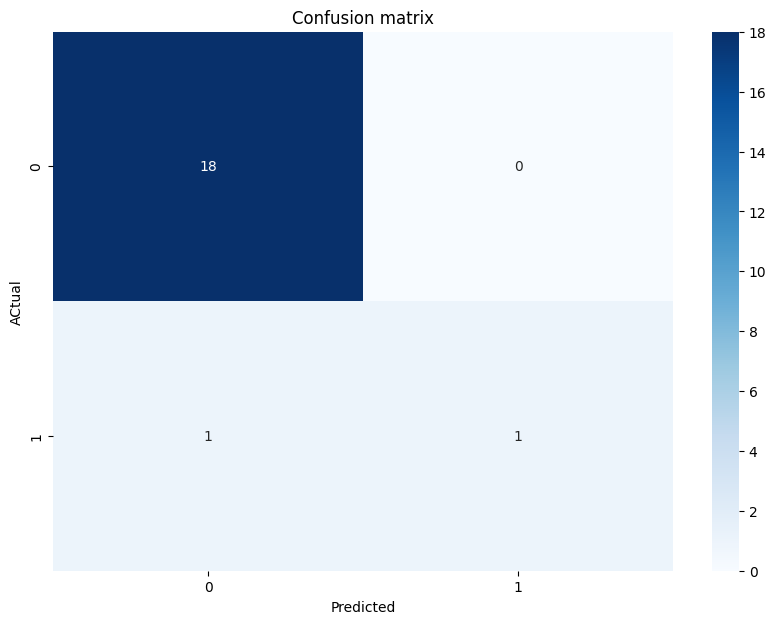

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.50      0.67         2

    accuracy                           0.95        20
   macro avg       0.97      0.75      0.82        20
weighted avg       0.95      0.95      0.94        20



In [ ]:
#confusion matrix for dt

cm_dt=confusion_matrix(y_test,y_pred_dt)

plt.figure(figsize=(10,7))
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('ACtual')
plt.show()

print(classification_report(y_test,y_pred_dt))

In [ ]:
#model Development- LogisticRegression

lr_model= LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_lr=lr_model.predict(X_test)
y_pred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#accuracy score for LR

accuracy_score(y_test,y_pred_lr)

0.9

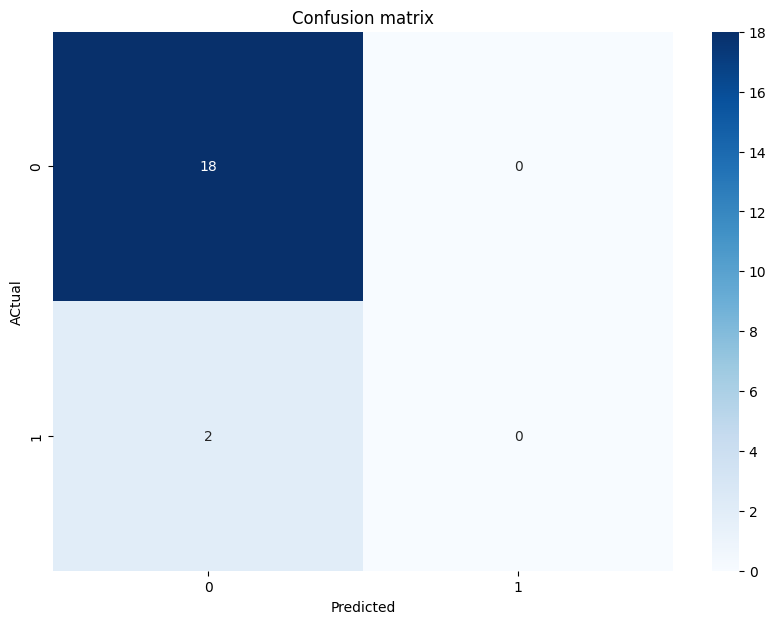

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#confusion matrix for LR

cm_dt=confusion_matrix(y_test,y_pred_lr)

plt.figure(figsize=(10,7))
sns.heatmap(cm_dt,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('ACtual')
plt.show()

print(classification_report(y_test,y_pred_lr))

In [ ]:
#random forest
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

y_pred_rf=rf_model.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred_rf)

0.9

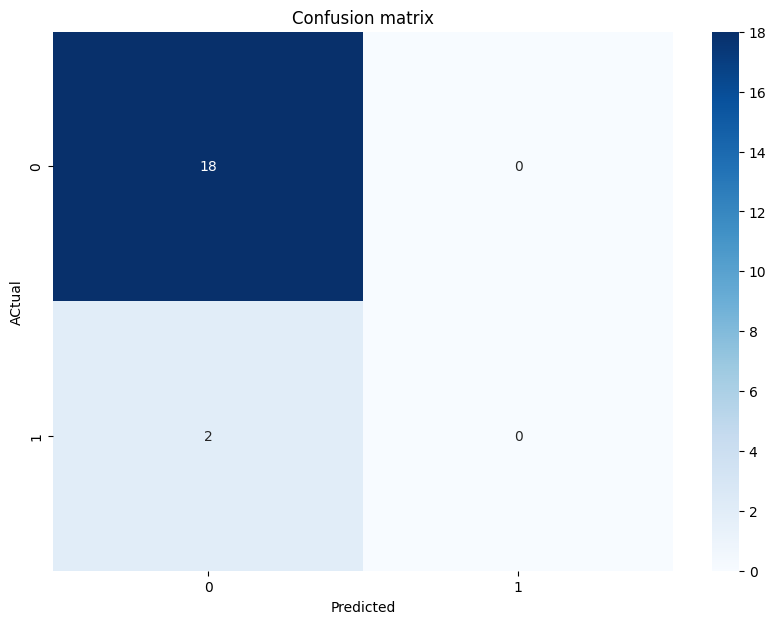

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.00      0.00      0.00         2

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
cm_rf=confusion_matrix(y_test,y_pred_rf)

plt.figure(figsize=(10,7))
sns.heatmap(cm_rf,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('ACtual')
plt.show()

print(classification_report(y_test,y_pred_rf))

In [ ]:
from sklearn.svm import SVC

model=SVC(kernel='rbf',C=1.0,gamma='scale')
model.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_svc=rf_model.predict(X_test)
y_pred_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy_score(y_test,y_pred_svc)

0.9

In [ ]:
joblib.dump(model,'waste_management_model.pkl')

['waste_management_model.pkl']

In [ ]:
import gradio as gr
import joblib
import pandas as pd

model=joblib.load('waste_management_model.pkl')

In [ ]:
def predict_management_strategy(waste_type,material_composition,recycling_potential,toxicity_level):
  #create a DataFrame from the input values
  input_data=pd.DataFrame([{
      'waste_type':waste_type,
      'material_composition':material_composition,
      'recycling_potential':recycling_potential,
      'toxicity_level':toxicity_level
  }])

  #make predictions
  prediction = model.predict(input_data)[0]

  #map prediction to a human readable label
  if prediction == 0:
    return 'Non-Recyclable'
  else:
    return 'Recyclable'

waste_type_input = gr.Slider(minimum=1, maximum=3, step=0.01, label="Waste Type(1-3)")
material_composition_input = gr.Slider(minimum=0.0, maximum=1.0, step=0.01, label="material_composition(0-1)")
recycling_potential_input = gr.Slider(minimum=0.0, maximum=1.0, step=0.01, label="recycling_potential(0-1)")
toxicity_level_input = gr.Slider(minimum=0.0, maximum=1.0, step=0.01, label="toxicity_level(1-100)")

interface= gr.Interface(
    fn=predict_management_strategy,
    inputs=[
        waste_type_input,
        material_composition_input,
        recycling_potential_input,
        toxicity_level_input
    ],
    outputs="text",
    title="Waste Management Strategy Predictor",
    description="Enter waste characteristics to predict the management strategy (Non-Recyclable/Recyclable)"
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e231c2706d7cb3a68f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
